In [2]:
%load_ext autoreload
%autoreload 2
#%matplotlib inline
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
from operator import itemgetter
from edog.tools import*
from edog.plot import*
plt.style.use('seaborn')
plt.rcParams.update(edog.plot.params)

filename = "params.yaml"
params = parse_parameters(filename)


nt, nr, dt, dr = itemgetter("nt", "nr", "dt", "dr")(params["grid"])
stim_delay, duration, patch_diameter = itemgetter("delay", "duration", "patch_diameter")(params["stimulus"])

A_g, a_g, B_g, b_g = itemgetter("A", "a", "B", "b")(params["ganglion"])
phase, damping, delay_g = itemgetter("phase", "damping", "delay")(params["ganglion"])

w_rg, A_rg, a_rg = itemgetter("w", "A", "a")(params["relay"]["Krg"])
tau_rg, delay_rg = itemgetter("tau", "delay")(params["relay"]["Krg"])

w_rig, A_rig, a_rig = itemgetter("w", "A", "a")(params["relay"]["Krig"])
tau_rig, delay_rig = itemgetter("tau", "delay")(params["relay"]["Krig"])

w_rc_ex, A_rc_ex, a_rc_ex = itemgetter("w", "A", "a")(params["relay"]["Krc_ex"])
tau_rc_ex, delay_rc_ex = itemgetter("tau", "delay")(params["relay"]["Krc_ex"])

w_rc_in, A_rc_in, a_rc_in = itemgetter("w", "A", "a")(params["relay"]["Krc_in"])
tau_rc_in, delay_rc_in = itemgetter("tau", "delay")(params["relay"]["Krc_in"])

w_rc_mix = itemgetter("w")(params["relay"]["Krc_mix"])
A_rc_mix_in, a_rc_mix_in = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_in"])
tau_rc_mix_in = itemgetter("tau")(params["relay"]["Krc_mix"]["Krc_in"])
A_rc_mix_ex, a_rc_mix_ex = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_ex"])
tau_rc_mix_ex = itemgetter("tau")(params["relay"]["Krc_mix"]["Krc_ex"])

delayed_in, delayed_ex = itemgetter("delayed_in", "delayed_ex")(params["relay"]["Krc_mix"])
stim_off_index = int(round(duration / dt))

size_tuning = {"fb_ex": {}, "fb_in": {}, "fb_mix": {}}

## Feedback excitation

In [3]:
for k, delay in enumerate(delay_rc_ex):
    print("temporal delay:", delay)
    size_tuning["fb_ex"][k] = {}
    tuning_curve = np.zeros([len(w_rc_ex), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_ex))
    supp_index = np.zeros(len(w_rc_ex))
    
    for i, w in enumerate(w_rc_ex):
        network = create_spatiotemporal_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                                A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                phase=phase, damping=damping, delay_g=delay_g,
                                                w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                tau_rg=tau_rg, delay_rg=delay_rg,
                                                w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                tau_rig=tau_rig, delay_rig=delay_rig,
                                                w_rc_ex=w, A_rc_ex=A_rc_ex, a_rc_ex=a_rc_ex,
                                                tau_rc_ex=tau_rc_ex, delay_rc_ex=delay)

        spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                 patch_diameter=patch_diameter,
                                                                 delay=stim_delay,
                                                                 duration=duration)

        tuning_curve[i, :] = np.mean(spatiotemporal_tuning[:stim_off_index, :], axis=0)

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])

    size_tuning["fb_ex"][k] = {"tuning_curve": tuning_curve, 
                               "cen_size": cen_size, 
                               "supp_index": supp_index}

temporal delay: 5.0 ms
temporal delay: 30.0 ms


## Feedback inhibition

In [4]:
for k, delay in enumerate(delay_rc_in):
    print("temporal delay:", delay)
    size_tuning["fb_in"][k] = {}
    tuning_curve = np.zeros([len(w_rc_in), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_in))
    supp_index = np.zeros(len(w_rc_in))
    
    for i, w in enumerate(w_rc_in):
        network = create_spatiotemporal_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                                A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                phase=phase, damping=damping, delay_g=delay_g,
                                                w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                tau_rg=tau_rg, delay_rg=delay_rg,
                                                w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                tau_rig=tau_rig, delay_rig=delay_rig,
                                                w_rc_in=w, A_rc_in=A_rc_in, a_rc_in=a_rc_in,
                                                tau_rc_in=tau_rc_in, delay_rc_in=delay)

        spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                 patch_diameter=patch_diameter,
                                                                 delay=stim_delay,
                                                                 duration=duration)

        tuning_curve[i, :] = np.mean(spatiotemporal_tuning[:stim_off_index,:], axis=0)

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])

    size_tuning["fb_in"][k] = {"tuning_curve": tuning_curve, 
                               "cen_size": cen_size, 
                               "supp_index": supp_index}

temporal delay: 5.0 ms
temporal delay: 30.0 ms


## Mixed excitatory and inhibitory feedback

In [5]:
for k, params in enumerate([delayed_in, delayed_ex]):
    print("temporal delay:", params)
    size_tuning["fb_mix"][k] = {}
    tuning_curve = np.zeros([len(w_rc_mix), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_mix))
    supp_index = np.zeros(len(w_rc_mix))
    
    for i, w in enumerate(w_rc_mix):
        network = create_spatiotemporal_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                                A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                phase=phase, damping=damping, delay_g=delay_g,
                                                w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                tau_rg=tau_rg, delay_rg=delay_rg,
                                                w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                tau_rig=tau_rig, delay_rig=delay_rig,
                                                w_rc_ex=w, A_rc_ex=A_rc_mix_ex, a_rc_ex=a_rc_mix_ex,
                                                tau_rc_ex=tau_rc_mix_ex, delay_rc_ex=params["delay_ex"],
                                                w_rc_in=w, A_rc_in=A_rc_mix_in, a_rc_in=a_rc_mix_in,
                                                tau_rc_in=tau_rc_mix_in, delay_rc_in=params["delay_in"])

        spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                 patch_diameter=patch_diameter,
                                                                 delay=stim_delay,
                                                                 duration=duration)

        tuning_curve[i, :] = np.mean(spatiotemporal_tuning[:stim_off_index,:], axis=0)

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])


    size_tuning["fb_mix"][k] = {"tuning_curve": tuning_curve, 
                                "cen_size": cen_size, 
                                "supp_index": supp_index}

temporal delay: {'delay_ex': array(5) * ms, 'delay_in': array(30) * ms}
temporal delay: {'delay_ex': array(30) * ms, 'delay_in': array(5) * ms}


-------------
## Plotting

### Size tuning curves

<IPython.core.display.Javascript object>


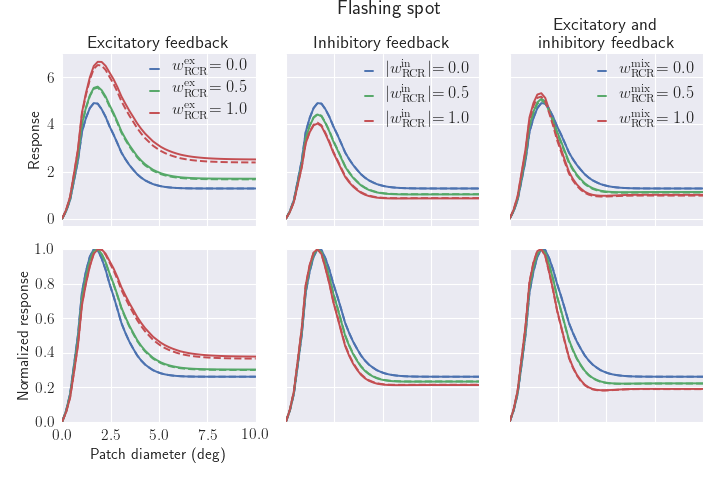

In [6]:
titles = ["Excitatory feedback", "Inhibitory feedback", "Excitatory and\ninhibitory feedback"]
labels = [r"$w^\mathrm{ex}_{\mathrm{RCR}}$", r"$|w^\mathrm{in}_{\mathrm{RCR}}|$", 
          r"$w^\mathrm{mix}_{\mathrm{RCR}}$"]


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9, 6), sharey="row", sharex="col")
fig.text(0.47, 0.97, ("Flashing spot"), fontsize=18)

# Size tuning curves:
for k, linestyle in enumerate(["-", "--"]):
    for ax, w_rc, curves, title, label in zip([ax1, ax2, ax3],
                                               [w_rc_ex, w_rc_in, w_rc_mix], 
                                               [size_tuning["fb_ex"][k]["tuning_curve"], 
                                                size_tuning["fb_in"][k]["tuning_curve"], 
                                                size_tuning["fb_mix"][k]["tuning_curve"]],
                                               titles, labels):

        for w, curve, color in zip(w_rc[:-1], curves[:-1], ["C0", "C1", "C2"]):
            if k==0:
                label_=label+"$={}$".format(round(w, 1))
            else:
                label_=""
            ax.plot(patch_diameter, curve, linestyle, color=color, label=label_)

        ax.set_xlim([0, 10])
        #ax.set_ylim([0, 6.4])
        ax.legend(fontsize=15, handlelength=0.5, labelspacing=0.4, borderpad=0.0)
        ax.set_title(title)


    ax1.set_ylabel("Response")
    ax2.set_xticklabels([])
    ax3.set_xticklabels([])


    # Normalized tuning curves:
    for ax, w_rc, curves, title, label in zip([ax4, ax5, ax6],
                                               [w_rc_ex, w_rc_in, w_rc_mix], 
                                               [size_tuning["fb_ex"][k]["tuning_curve"], 
                                                size_tuning["fb_in"][k]["tuning_curve"], 
                                                size_tuning["fb_mix"][k]["tuning_curve"]],
                                               titles, labels):

        for w, curve, color in zip(w_rc[:-1], curves[:-1], ["C0", "C1", "C2"]):
            norm_curve = (curve - curve.min()) / (curve - curve.min()).max()
            ax.plot(patch_diameter, norm_curve, linestyle, color=color, label=label+"$={}$".format(round(w, 1)))

        ax.set_xlim([0, 10])
        ax.set_ylim([0, 1.0])

    ax4.set_ylabel("Normalized response")
    ax4.set_xlabel("Patch diameter (deg)")
    fig.tight_layout()

### Optimal size and Suppression index

<IPython.core.display.Javascript object>


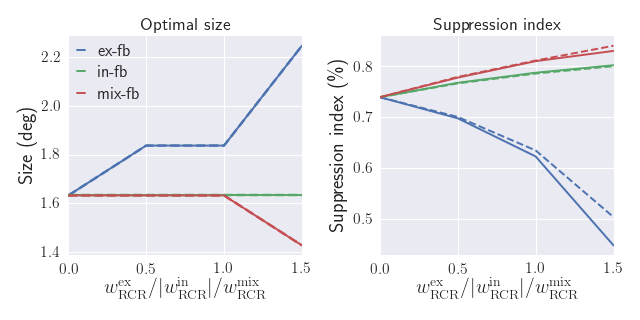

In [7]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(8, 4))

# optimal size
ax2.plot(w_rc_ex, size_tuning["fb_ex"][0]["cen_size"], 'C0-', label="ex-fb")
ax2.plot(w_rc_in, size_tuning["fb_in"][0]["cen_size"], 'C1-', label="in-fb")
ax2.plot(w_rc_mix, size_tuning["fb_mix"][0]["cen_size"], 'C2-', label="mix-fb")
ax2.plot(w_rc_ex, size_tuning["fb_ex"][1]["cen_size"], 'C0--', lw=2.2)
ax2.plot(w_rc_in, size_tuning["fb_in"][1]["cen_size"], 'C1--', lw=2.2)
ax2.plot(w_rc_mix, size_tuning["fb_mix"][1]["cen_size"], 'C2--', lw=2.2)

ax2.legend(fontsize=15, handlelength=0.5, labelspacing=0.4, borderpad=0.0)
ax2.set_title("Optimal size")
ax2.set_ylabel("Size (deg)", fontsize=18)
ax2.set_xlabel(r"$w^\mathrm{ex}_{\mathrm{RCR}}/|w^\mathrm{in}_{\mathrm{RCR}}|/w^\mathrm{mix}_{\mathrm{RCR}}$", fontsize=18)
ax2.set_xlim([0, 1.5])

# suppression index
ax3.plot(w_rc_ex, size_tuning["fb_ex"][0]["supp_index"], 'C0-', label="ex-fb")
ax3.plot(w_rc_in, size_tuning["fb_in"][0]["supp_index"], 'C1-', label="in-fb")
ax3.plot(w_rc_mix, size_tuning["fb_mix"][0]["supp_index"], 'C2-', label="mix-fb")
ax3.plot(w_rc_ex, size_tuning["fb_ex"][1]["supp_index"], 'C0--')
ax3.plot(w_rc_in, size_tuning["fb_in"][1]["supp_index"], 'C1--')
ax3.plot(w_rc_mix, size_tuning["fb_mix"][1]["supp_index"], 'C2--')

ax3.set_title("Suppression index")
ax3.set_ylabel(r"Suppression index (\%)", fontsize=18)
ax3.set_xlabel(r"$w^\mathrm{ex}_{\mathrm{RCR}}/|w^\mathrm{in}_{\mathrm{RCR}}|/w^\mathrm{mix}_{\mathrm{RCR}}$", fontsize=18)
ax3.set_xlim([0, 1.5])


fig.tight_layout()